---
title: Plane Waves and Math Review - Homework 01
date: 2025-01-12
authors:
  - name: Professor Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

This is the first homework assignment for *Lasers and Optomechanics* at Syracuse University.

<span style="color:#ff5555;">**It is due 5pm on Friday, January 23, 2026**</span>

**You will need to complete the questions in this jupyter notebook and submit it via your `git` repo**


In [ ]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        #"font.family": "serif",
        #"font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

**<span style="color:#ffaaff;">Approximations Review</span>**

In this course, you will need to remember and use some basic approximations.\
These approximations all come from taking the [*Taylor Expansion*](https://en.wikipedia.org/wiki/Taylor_series) of a function $f(x)$ about some point $x = a$:
$$f(x)\Bigr|_{x \rightarrow a} \approx f(a) + f'(a) (x-a) + \dfrac{1}{2!} f''(a) (x-a)^2 = \displaystyle \sum_{n=0}^\infty \dfrac{f^{(n)}(a)}{n!}(x - a)^n$$


# <span style="color: #ff5500">Question 1: Binomial Approximation</a>
The binomial approximation to first order in $x$ is as follows:
\begin{align}
(1 + x)^{n} \approx 1 + n x.
\end{align}

## <span style="color:#ccccff;">Question 1A</span>
Derive the binomial approximation using the Taylor Expansion to first order about $x = 0$

## <span style="color:#ccccff;">Question 1B</span>
Find the second and third order terms of the binomial approximation

## <span style="color:#ccccff;">Question 1C</span>
Plot the binomial function on $x \in [-1, 1]$ for $n = \dfrac{1}{2}$.\
Compare to plots of the first, second, and third order binomial approximation.\
At what $x > 0$ does each approximation fail, becoming greater than 5\% error?

## Question 1A Solution: <span style="color:#ff5555;">(This example filled out for you)</span>
Let $$f(x) = (1 + x)^n,$$ 
then at $x = 0$, $$f(0) = 1.$$
Then the first derivative $f'(x)$ is $$f'(x) = n (1 + x)^{n-1}$$
and the derivative evaluated at $x = 0$ is $$f'(0) = n$$

The Taylor Expansion to first order then becomes 
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x\\~\\
&= 1 + n x
\end{align}

## Question 1B Solution:
Taking the second and third derivatives, and evaluating at 0 yields
\begin{align}
f''(x) &= n (n-1) (1 + x)^{n-2} \\
f'''(x) &= n (n-1) (n-2) (1 + x)^{n-3} \\~\\
f''(0) &= n (n-1)\\
f''(0) &= n (n-1) (n-2)
\end{align}

The second order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2
\end{align}

The third order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2 + \dfrac{1}{3!} f'''(0) x^3\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2 + \dfrac{1}{6} n (n-1) (n-2) x^3
\end{align}

In [ ]:
def binom(xx:float, nn:float):
    """Binomial function (1 + xx)^nn
    
    Inputs:
    -------
    xx: float or array of floats
        binomial variable
    nn: float
        binomial exponent

    Output:
    -------
    binom: float or array of floats
        binomial expansion
    """
    return (1 + xx)**nn

In [ ]:
# Parameter definitions.  Protip: never make single-letter variable names
nn = 0.5
xx = np.linspace(-1, 2, 100)

taylor0 = 1
taylor1 = taylor0 + nn * xx
taylor2 = taylor1 + 0.5 * nn * (nn - 1) * xx**2
taylor3 = taylor2 + (1/6) * nn * (nn - 1) * (nn - 2) * xx**3

In [ ]:
# At which x does the error become greater than 10%?
# First, we divide the approximation by the real function,
# Second, we subtract 1 from that ratio
# Third, we take the absolute value of the subtraction
# Fourth, we look for the first location where the final result is greater than 0.1
# Fifth, we find where x > 0
# Sixth, we take the intersection of the indices found
# Seventh, we find the first index where the error is large for plotting
error = 0.05
model = binom(xx, nn)

xx_errors = np.array([])
for taylor in [taylor1, taylor2, taylor3]:
    abs_errors = np.abs(taylor/model - 1) # final result
    indices_error = np.argwhere(abs_errors > error)
    indices_x = np.argwhere(xx > 0)
    
    indices_final = np.intersect1d(indices_error, indices_x)
    index = indices_final[0]
    
    xx_errors = np.append(xx_errors, xx[index])
print(xx_errors)

[0.87878788 1.3030303  1.42424242]


/tmp/ipykernel_12178/3003632814.py:14: RuntimeWarning: divide by zero encountered in divide
  abs_errors = np.abs(taylor/model - 1) # final result


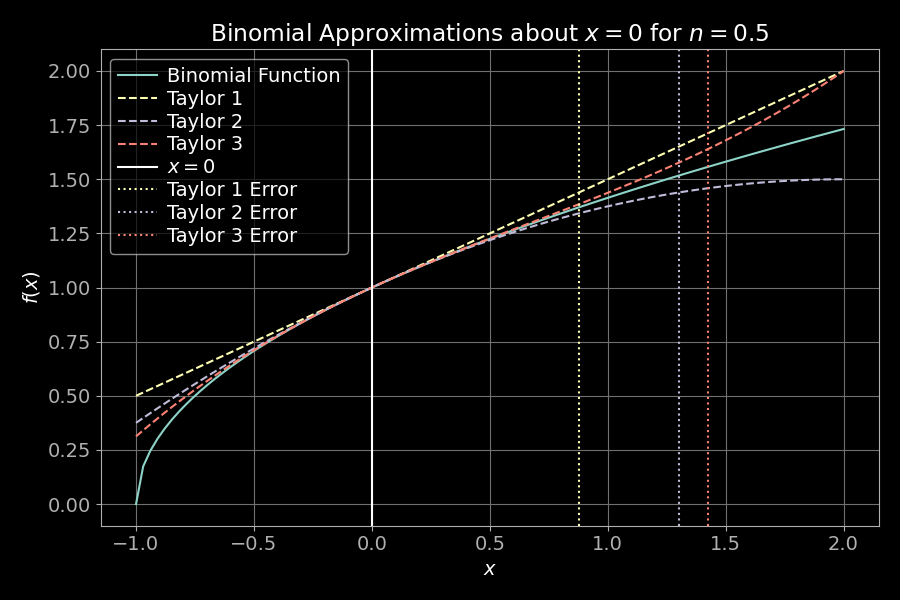

In [ ]:
fig, s1 = plt.subplots(1)

s1.plot(xx, binom(xx, nn), label="Binomial Function")
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")
s1.plot(xx, taylor3, ls="--", label="Taylor 3")

s1.axvline(x=0, label=f"$x = 0$")

for ii, xx_error in enumerate(xx_errors):
    s1.axvline(x=xx_error, color=f"C{ii+1}",ls=":", label=f"Taylor {ii+1} Error")

s1.set_title("Binomial Approximations about $x = 0$ for $n = " + f"{nn}" + "$")
s1.set_xlabel("$x$")
s1.set_ylabel("$f(x)$")
s1.legend()
s1.grid()
plt.show()

# <span style="color: #ff5500">Question 2: Sine and Cosine Approximations</a>

## Question 2A: Sine 
Repeat the Taylor Expansion approximations for sine  to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.

## Question 2B: Cosine
Repeat the Taylor Expansion approximations for cosine to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.


# 2A Solution:
$$ f(x) = \sin(x), \space f'(x) = \cos(x), \space f''(x) = -\sin(x), \space f'''(x) = -\cos(x) $$
$$ f(0) = f''(0) = 0, \space f'(0) = -f'''(0) = 1 $$
$$ \sin(x) \approx x - \frac{x^3}{6}$$

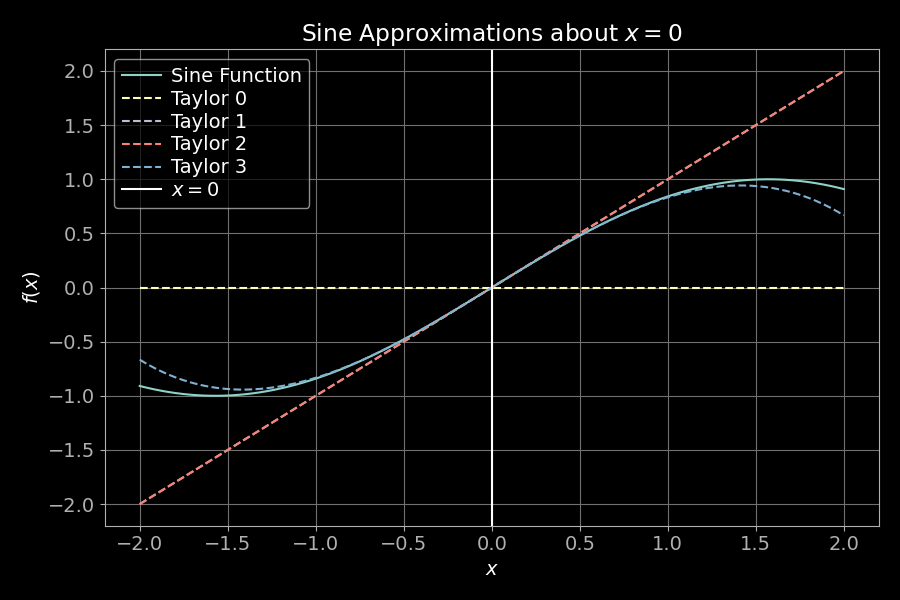

In [ ]:
xx = np.linspace(-2, 2, 100)

taylor0 = 0*xx
taylor1 = taylor0 + xx
taylor2 = taylor1 + 0
taylor3 = taylor2 - 1/6*xx**3

fig, s1 = plt.subplots(1)

s1.plot(xx, np.sin(xx), label="Sine Function")
s1.plot(xx, taylor0, ls="--", label="Taylor 0")
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")
s1.plot(xx, taylor3, ls="--", label="Taylor 3")

s1.axvline(x=0, label=f"$x = 0$")

s1.set_title("Sine Approximations about $x = 0$")
s1.set_xlabel("$x$")
s1.set_ylabel("$f(x)$")
s1.legend()
s1.grid()
plt.show()

# 2B Solution:
$$ f(x) = \cos(x),\space f'(x) = -\sin(x), \space f''(x) = -\cos(x), \space f'''(x) = \sin(x) $$
$$ f(0) = -f''(0) = 1, \space f'(0) = f'''(0) = 0 $$
$$ cos(x) \approx 1 - \frac{x^2}{2}$$

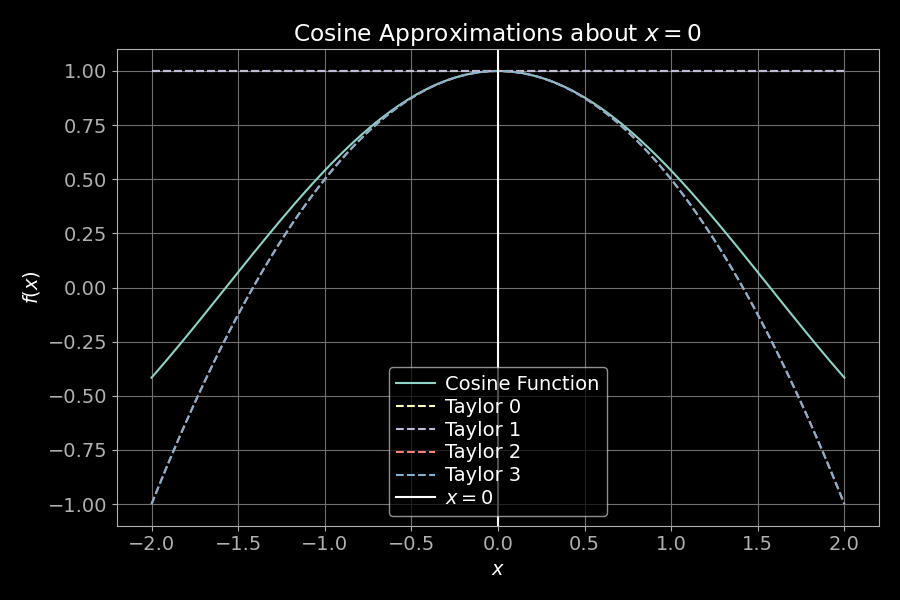

In [ ]:
xx = np.linspace(-2, 2, 100)

taylor0 = xx**0 
taylor1 = taylor0 + 0
taylor2 = taylor1 - 1/2*xx**2
taylor3 = taylor2 + 0

fig, s1 = plt.subplots(1)

s1.plot(xx, np.cos(xx), label="Cosine Function")
s1.plot(xx, taylor0, ls="--", label="Taylor 0")
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")
s1.plot(xx, taylor3, ls="--", label="Taylor 3")

s1.axvline(x=0, label=f"$x = 0$")

s1.set_title("Cosine Approximations about $x = 0$")
s1.set_xlabel("$x$")
s1.set_ylabel("$f(x)$")
s1.legend()
s1.grid()
plt.show()

# <span style="color: #ff5500">Question 3: Complex Number Review</a>

## Question 3A:
Plot the following complex function on a domain of $\phi \in [0, 2 \pi]$:
\begin{align}
z_1(\phi) &= 2 + e^{i \phi}\\
z_2(\phi) &= \dfrac{3}{2 - e^{i \phi}}\\
z_3(\phi) &= e^{(\sigma + i \omega) \phi}
\end{align}
where for $z_3$, $\sigma = -0.5$, and $\omega = 1$.

## Question 3B:
Calculate the magnitude $r(\phi)$ and argument $\theta(\phi)$ for each $z_i$.

## Question 3C:
Calculate the velocity of the phasors with respect to $\phi$, and draw them for each $z_i$ evaluated at $\phi = \left\{0, \dfrac{\pi}{2}, \pi, \dfrac{3\pi}{2} \right\}$

## Question 3D:
What is the primary difference between $z_1$ and $z_2$?

## Question 3E:
For $z_3$, substitute $\phi$ for $t$, and calculate the normalized time derivatives : $\dfrac{\dot{z_3}}{z_3}$, $\dfrac{\ddot{z_3}}{z_3}$

and find expressions for the normalized real polar coordinates $\dfrac{\dot{r}}{r}, \dfrac{\ddot{r}}{r}, \dot{\theta}, \ddot{\theta}$.

Discuss how the expressions you found for the polar coordinates relate to the path you plotted for $z_3$ in part A.  

What happens if $\sigma = +0.5$?

# 3A Solution:

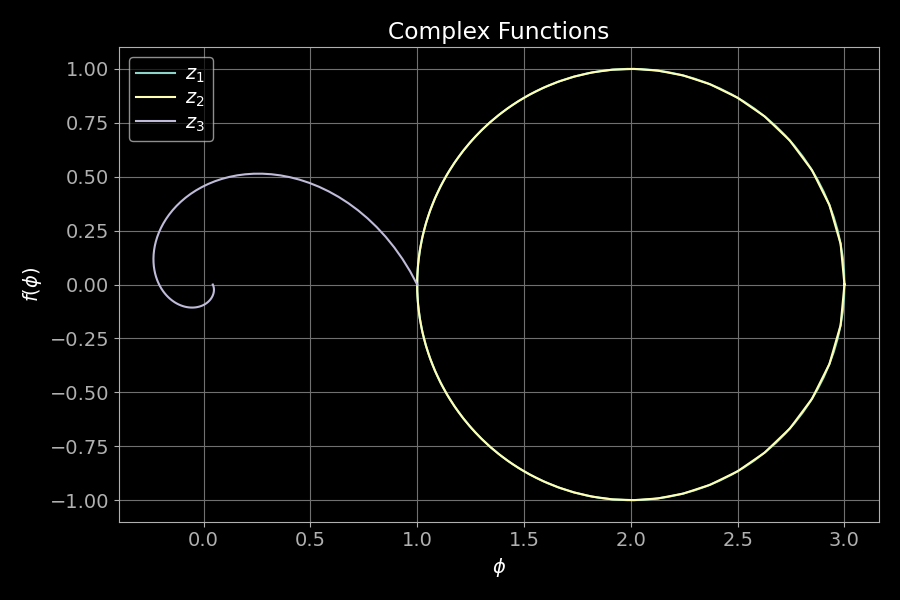

In [ ]:
def z1(phi):
    z1 = 2 + np.exp(1j*phi)
    return z1
def z2(phi):
    z2 = 3/(2 - np.exp(1j*phi))
    return z2
def z3(phi):
    sigma = -0.5
    omega = 1 
    z3 = np.exp((sigma+1j*omega)*phi)
    return z3

phi = np.linspace(0, 2*np.pi, 100)

fig, s1 = plt.subplots(1)

s1.plot(np.real(z1(phi)), np.imag(z1(phi)), ls="-", label="$z_1$")
s1.plot(np.real(z2(phi)), np.imag(z2(phi)), ls="-", label="$z_2$")
s1.plot(np.real(z3(phi)), np.imag(z3(phi)), ls="-", label="$z_3$")

s1.set_title("Complex Functions")
s1.set_xlabel("$\\phi$")
s1.set_ylabel("$f(\\phi)$")
s1.legend()
s1.grid()
plt.show()

# 3B Solution:
$z_1 = 2 + e^{i\phi} = 2 + \cos{\phi} + i*\sin{\phi}$

$r_1(\phi) = |z_1| = \sqrt{(2 + \cos{\phi} + i*\sin{\phi})(2 + \cos{\phi} - i*\sin{\phi})  } = \sqrt{(4 + 4\cos{\phi}) + cos^2{\phi} - i^2\sin^2{\phi}}$

$r_1(\phi) = \sqrt{5+4\cos\phi} $

$\theta_1(\phi) =  \arctan 2 (\sin\phi, 2 + \cos\phi)$

$z_2 = \frac{3}{2 - e^{i*\phi}} $

$r_2(\phi) = |z_2| = \sqrt{\frac{3*3}{(2 - e^{i\phi})(2 - e^{-i\phi})}}=\frac{3}{\sqrt{5-4\cos\phi}}$

$\theta_2(\phi) = \arctan2(\frac{3\sin\phi}{5-4\cos\phi},\frac{6 - 3\cos\phi}{5-4\cos\phi})$

$z_3 = e^{(\sigma + i\omega)\phi} = e^{\sigma \phi} e^{i\omega \phi} = e^{\sigma \phi}[\cos(\omega \phi)+i\sin(\omega \phi)]$

$r_3(\phi) = |z_3| = \sqrt{(e^{(\sigma + i\omega)\phi})(e^{(\sigma - i\omega)\phi})} = e^{\sigma\phi}$

$\theta_3(\phi) = \omega \phi$

# 3C Solution:
$\frac{dz_1}{d\phi} = ie^{i*\phi} $

$\frac{dz_2}{d\phi} = \frac{3ie^{i\phi}}{(2 - e^{i\phi})^2} $

$\frac{dz_3}{d\phi} = (\sigma + i\omega)e^{(\sigma + i\omega)\phi} $

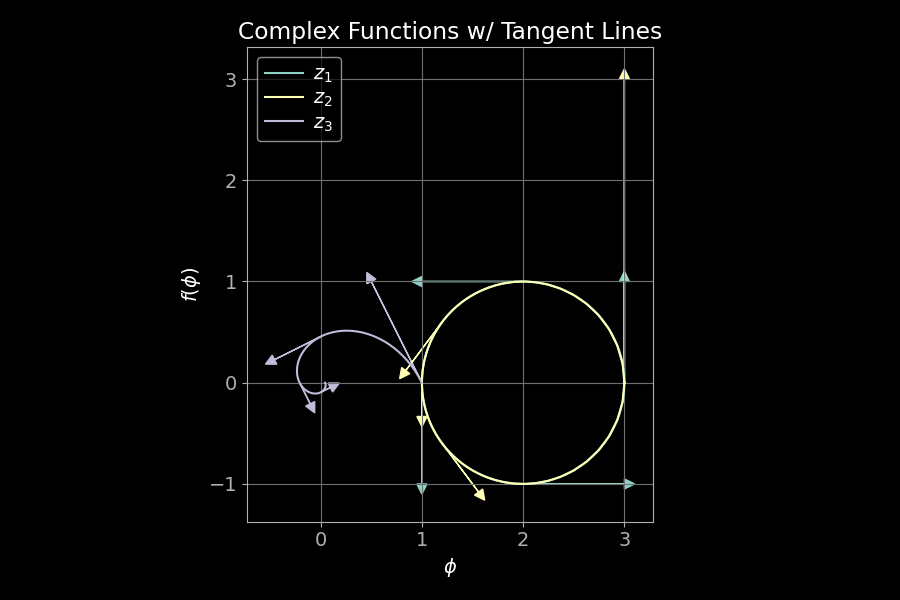

In [ ]:
def z1(phi):
    z1 = 2 + np.exp(1j*phi)
    return z1
def z2(phi):
    z2 = 3/(2 - np.exp(1j*phi))
    return z2
def z3(phi):
    sigma = -0.5
    omega = 1 
    z3 = np.exp((sigma+1j*omega)*phi)
    return z3

def dz1(phi):
    dz1 = 1j * np.exp(1j*phi)
    return dz1
def dz2(phi):
    dz2 =  3 * 1j * np.exp(1j*phi) / (2 - np.exp(1j*phi))**2
    return dz2
def dz3(phi):
    dz3 = (-0.5 + 1j) * np.exp((-0.5 + 1j)*phi)
    return dz3
    
phi = np.linspace(0, 2*np.pi, 100)

fig, s1 = plt.subplots(1)

s1.plot(np.real(z1(phi)), np.imag(z1(phi)), ls="-", label="$z_1$")
s1.plot(np.real(z2(phi)), np.imag(z2(phi)), ls="-", label="$z_2$")
s1.plot(np.real(z3(phi)), np.imag(z3(phi)), ls="-", label="$z_3$")

vals = [0,np.pi/2,np.pi,3*np.pi/2]
for i in range(len(vals)):
    s1.arrow(np.real(z1(vals[i])), np.imag(z1(vals[i])),np.real(dz1(vals[i])), np.imag(dz1(vals[i])), head_width=0.1, head_length=0.1, fc=f"C0", ec=f"C0")

    s1.arrow(np.real(z2(vals[i])), np.imag(z2(vals[i])),np.real(dz2(vals[i])), np.imag(dz2(vals[i])), head_width=0.1, head_length=0.1, fc=f"C1", ec=f"C1")
        
    s1.arrow(np.real(z3(vals[i])), np.imag(z3(vals[i])),np.real(dz3(vals[i])), np.imag(dz3(vals[i])), head_width=0.1, head_length=0.1, fc=f"C2", ec=f"C2")

s1.set_title("Complex Functions w/ Tangent Lines")
s1.set_xlabel("$\\phi$")
s1.set_ylabel("$f(\\phi)$")
s1.legend()
s1.set_aspect("equal")
s1.grid()
plt.show()

# 3D Solution:

The main difference between $z_1$ and $z_2$ is that the $z_1$ phasor has a constant speed with $\phi$ , whereas $z_2$ the speed is varying with $\phi$

# 3E Solution: 
Let $\space t = \phi$

$\dot{z_3} = (\sigma + i\omega) e^{(\sigma + i\omega)t} \Rightarrow \frac{\dot{z_3}}{z_3} = \sigma + i\omega$

$\ddot{z_3} = (\sigma + i\omega)^2 e^{(\sigma + i\omega)t} \Rightarrow \frac{\ddot{z_3}}{z_3} = (\sigma + i\omega)^2$

$\dot{r_3} = \sigma e^{\sigma t} \Rightarrow \frac{\dot{r_3}}{r_3} = \sigma$

$\ddot{r_3} = \sigma^2 e^{\sigma t} \Rightarrow \frac{\ddot{r_3}}{r_3} = \sigma^2$

$\dot{\theta_3} = \omega$

$\ddot{\theta_3} = 0 $

We find that angular speed is constant, and that the change in radius is also constant (and equal to $\sigma$). This makes sense looking at the graph, which looks to be a spiral consistantly rotating inward. If $\sigma = + 0.5$, then the spiral would be spiraling outward and increasing in size, as the radius would be increasing constantly.

# <span style="color: #ff5500">Question 4: Electric field propogating in 2D</a>
In class, we assumed that a plane wave was propogating in the $\hat{k} = \hat{z}$ direction, with the electric field oscillating in the $\hat{x}$ direction.\
Suppose now that the is oscillating in the $\dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})$ direction: 
\begin{align}
\boldsymbol{E} = E_0 \cos(\vec{k} \cdot \vec{r} - \omega t) \dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})
\end{align}

## Question 4A:
What direction of propogation $\hat{k}$ and magnetic field vector $\boldsymbol{B}$ are now possible?\
Draw a diagram of the electric field vector and the plane of propogation.

## Question 4B:
What are the expressions for $\hat{k}$ and $\boldsymbol{B}$ if we constrain the direction of propogating to be (partially) in the positive $\hat{x}$ direction? 

#  4A Solution:
Since electric and magnetic fields are perpendicular, propogation has either vector in the plane with $\frac{1}{\sqrt{2}}(-\hat{x}+\hat{y})$ or $\frac{1}{\sqrt{2}}(\hat{x}-\hat{y})$, with the other purely in the $\hat{z}$ direction.


# 4B Solution:
If $k_x > 0$ and $E \cdot k = 0$, then $\hat{k} = \frac{1}{\sqrt{2}}(\hat{x}-\hat{y})$

In [ ]:
fig, s1 = plt.subplots(1)

xx = np.linspace(-1, 1, 100)
s1.arrow(0, 0,1, 1, head_width=0.1, head_length=0.1, fc=f"C1", ec=f"C1",label="E-field")
s1.plot(xx, -xx, ls="-", label="Plane of Propogation")

s1.grid()
s1.set_title("Electric Field and Propogation Plane")
s1.legend()
s1.set_aspect("equal")
plt.show()

# <span style="color: #ff5500">Question 5: Spherical Plane Wave Intensity and Radiation Pressure</a>

Suppose you have a sinusoidal spherical plane wave source a distance $d$ away along the $\hat{z}$ axis from a cylindrical mirror with radius $a$.\
Use the center of the spherical wave as the origin, and the distance from that center as the variable $r$.\
Assume that the cylinder is in the $xy$ plane.\
Also assume that the spherical wave is emitting total power $P_\mathrm{total}$ in all directions.


## Question 5A:
What is the Poynting vector $\boldsymbol{S}$ for the spherical waves?\
*Hint: Equation 9.49 of Griffith's E&M may be helpful here*

## Question 5B:
What is the Poynting vector $\boldsymbol{S}$ incident on the mirror center?\
What about the mirror edge?\
Write an expression for the Poynting vector incident anywhere on the mirror's surface.

## Question 5C:
Using your result from Question 5B, find the intensity $I$ incident on the mirror.

## Question 5D:
Find the total power $P$ incident on the mirror.\
Compare to the total power emitted by the spherical plane wave.

## Question 5E: 
Calculate the radiation pressure $p_\mathrm{rad}$ incident on the mirror.\
Also find the radiation pressure force $F_\mathrm{rad}$.\
Assume the mirror is a perfect reflector.\
If the mirror has a mass $m$, what is its acceleration?

# 5A Solution:
The Poynting vector is in the direction of propogation which is in power per unit area, so for a spherical wave the Poynting vector is

$\vec{S} = \dfrac{P_{\text{total}}}{4\pi r^2}\hat{r}$

# 5B Solution:
Mirror center: $r=d$, so the Poynting vector is $\vec{S} = \dfrac{P_{\text{total}}}{4\pi d^2}\hat{z}$.

Edge: $r=\sqrt{d^2 + a^2}$, and the direction is still radial, so the Poynting vector is $\vec{S} = \dfrac{P_{\text{total}}}{4\pi(d^2 + a^2)}\hat{r}$, 

Anywhere:  $\vec{S} = \dfrac{P_{\text{total}}}{4\pi(d^2 + s^2)}\hat{r}$, where $s$ is the radial coordinate in the $xy$-plane, and is in the range $[0,a]$.
# 5C Solution:
Only the $\hat{z}$ component of $S$: 

$I = \vec{S} \cdot \hat{z} = \dfrac{P_{\text{total}} d}{4\pi(d^2 + s^2)^{3/2}}$


# 5D Solution:
Power is the surface integral of intensity across the mirror:

$P = \displaystyle \int_0^a I\cdot dA = \int_0^a \dfrac{P_{\text{total}} d}{4\pi(d^2 + s^2)^{3/2}} 2\pi s ds = \dfrac{P_{\text{total}} d}{2} \int_0^a \dfrac{s}{(d^2 + s^2)^{3/2}}ds$

$u$ substitution:

$u = d^2 + s^2$, $du = 2sds$ 

 $\displaystyle P = \dfrac{P_{\text{total}} d}{4} \int_0^a \dfrac{du}{(u)^{3/2}} = \dfrac{P_{\text{total}} d}{4} \left[\frac{-2}{\sqrt{d^2+s^2}}\right]_0^a = {\dfrac{P_{\text{total}}}{2}\left(1-\frac{d}{\sqrt{d^2+a^2}}\right)}$

Compared to the total power, it is at most half, depending on the ratio of $a$ and $d$ 

# 5E Solution:


$p_{\text{rad}} = \dfrac{2I}{c} = \dfrac{P_{\text{total}} d}{4\pi c(d^2 + s^2)^{3/2}}$ 

$F_{\text{rad}} = \dfrac{P}{c} = \dfrac{P_{\text{total}}}{c}\left(1-\dfrac{d}{\sqrt{d^2+a^2}}\right)$

$a = \dfrac{F_{\text{rad}}}{m} = \dfrac{P_{\text{total}}}{2mc}\left(1-\dfrac{d}{\sqrt{d^2+a^2}}\right)$